### iris.csv SVC 모델 학습

In [1]:
import pandas as pd
import numpy as np

In [2]:
irisDF = pd.read_csv('../DATA/iris.csv')
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [3]:
irisDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
# 피쳐 / 타겟 분리
featureDF = irisDF[irisDF.columns[:-1]]
targetSR = irisDF['species']
featureDF.shape, targetSR.shape

((150, 4), (150,))

StandardScaler, SVC 순차적으로 <hr>

In [5]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR, test_size=0.2, random_state=5)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [6]:
# 피쳐 스케일링
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler_list = [StandardScaler, MinMaxScaler, RobustScaler]
scaled_x_train, scaled_x_test = [], []

for sc in scaler_list:
    scaler = sc()
    scaler.fit(x_train)
    
    scaled_x_train.append(scaler.transform(x_train))
    scaled_x_test.append(scaler.transform(x_test))

In [7]:
import matplotlib.pyplot as plt

In [8]:
# 학습 수행, 학습 평가
from sklearn.svm import SVC

for i, sc in enumerate(['StandardScaler', 'MinMaxScaler', 'RobustScaler']):
    svc_model = SVC(gamma='auto', kernel='linear')  # kernel 매개변수 기본값은 'rbf'
    svc_model.fit(scaled_x_train[i], y_train)
    
    svc_train_score = svc_model.score(scaled_x_train[i], y_train)
    svc_test_score = svc_model.score(scaled_x_test[i], y_test)
    
    print(f'[ {sc} ]')
    print(f'svc train score : {svc_train_score}')
    print(f'svc test score : {svc_test_score}')
    print()
    
    print('coef_ : ', svc_model.coef_, sep='\n', end='\n\n')
    print('intercept_ : ', svc_model.intercept_, sep='\n', end='\n\n')

[ StandardScaler ]
svc train score : 0.9833333333333333
svc test score : 0.9333333333333333

coef_ : 
[[-0.46735805  0.29788961 -0.87712433 -0.91696375]
 [-0.09077351  0.13808167 -0.56446202 -0.54738982]
 [ 0.5121709   0.42677855 -2.07399962 -2.37036604]]

intercept_ : 
[-1.46601553 -0.29399986  2.68920009]

[ MinMaxScaler ]
svc train score : 0.975
svc test score : 0.9

coef_ : 
[[-7.96694971e-01  1.35444759e+00 -2.08336786e+00 -1.87169355e+00]
 [-5.15202799e-01  5.29939242e-01 -1.60131922e+00 -1.51806849e+00]
 [ 8.74569012e-04  4.74778242e-01 -2.71133077e+00 -4.09510349e+00]]

intercept_ : 
[0.73339484 1.17040277 4.36655557]

[ RobustScaler ]
svc train score : 0.9833333333333333
svc test score : 0.9333333333333333

coef_ : 
[[-0.73838411  0.64338617 -1.1275187  -1.1691655 ]
 [-0.28483715  0.18848067 -0.96592246 -0.97562023]
 [ 0.25518001  0.32212075 -2.68661409 -3.52040763]]

intercept_ : 
[-1.1760327  -0.47623008  1.2348151 ]


pipeline (StandardScaler + SVC) <hr>

In [9]:
x_train, x_test, y_train, y_test = train_test_split(featureDF, targetSR, stratify=targetSR, test_size=0.2, random_state=5)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((120, 4), (120,), (30, 4), (30,))

In [10]:
from sklearn.pipeline import make_pipeline

C_list = [0.001, 0.01, 0.1, 1, 10, 100]
# C_list = np.linspace(0.0018, 0.004, 10)
train_score, test_score = [], []

for C in C_list:
    clf = make_pipeline(StandardScaler(), SVC(max_iter=10000, gamma='auto', kernel='linear', C=C))  # probability 파라미터 ?
    clf.fit(x_train, y_train)
    
    pipe_train_score = clf.score(x_train, y_train)
    pipe_test_score = clf.score(x_test, y_test)
    
    # print(f'{C}')
    # print(f'pipe train score : {pipe_train_score}')
    # print(f'pipe test score : {pipe_test_score}')
    
    train_score.append(pipe_train_score)
    test_score.append(pipe_test_score)

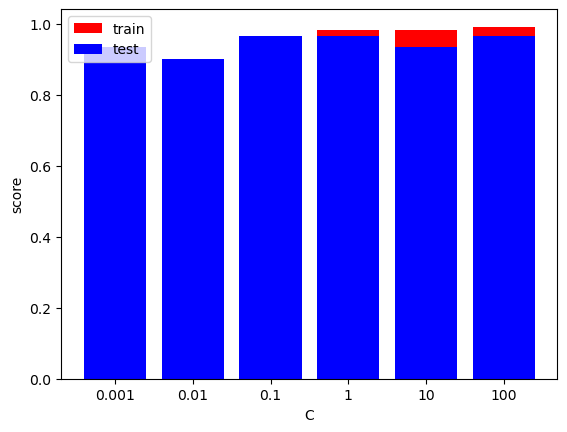

In [11]:
import matplotlib.pyplot as plt

plt.bar(list(map(str, C_list)), train_score, color='red', label='train')
plt.bar(list(map(str, C_list)), test_score, color='blue', label='test')
plt.xlabel('C')
plt.ylabel('score')
plt.legend()
plt.show()

<Axes: xlabel='C'>

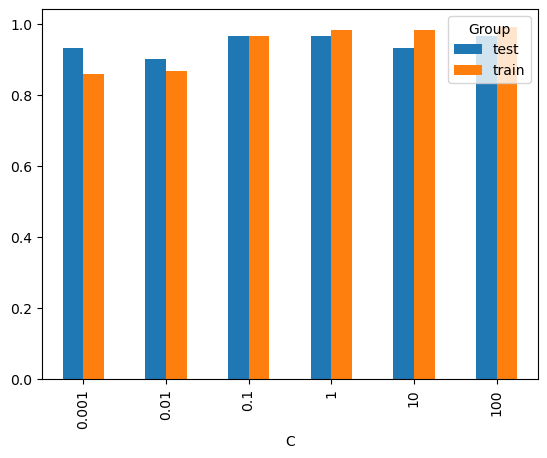

In [12]:
train_df = pd.DataFrame({'C' : list(map(str, C_list)), 'Values' : train_score, 'Group': 'train'})
test_df = pd.DataFrame({'C' : list(map(str, C_list)), 'Values' : test_score, 'Group': 'test'})
score_df = pd.concat([train_df, test_df])
score_pivot = score_df.pivot(columns='Group', index='C', values='Values')
score_pivot.plot(kind='bar')    # pandas.core.frame.DataFrame

In [ ]:
# 교과서에 나오는 그림 ?
# scikit-learn documentation 예제 코드에 어떻게 그리는지 나옴
